In [1]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

# add path
if '../..' in sys.path:
    pass
else:
    sys.path.insert(0, '../..')

from loader.greenhouse_loader import GreenhouseLoader
from loader.construction_industry import ConstructionLoader

def load_co2_data():
    ghg_loader = GreenhouseLoader()
    cur_dir = os.getcwd()
    os.chdir('../../')
    ghg_loader.load()
    df_ghg = ghg_loader.get_data()
    os.chdir(cur_dir)
    return df_ghg

def load_construction_industry():
    construction_loader = ConstructionLoader()
    cur_dir = os.getcwd()
    os.chdir('../../')
    construction_loader.load()
    df_construction = construction_loader.get_data()
    os.chdir(cur_dir)
    return df_construction

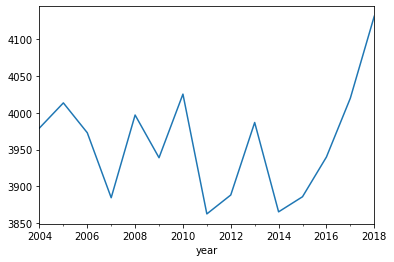

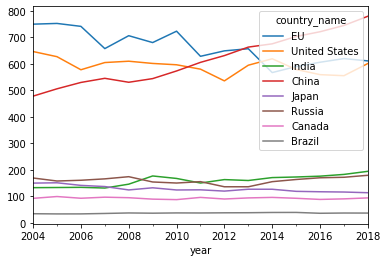

In [2]:
gg_data = load_co2_data()
co2_df = gg_data['co2_country_sector']['Buildings']
co2_df.index = pd.to_datetime(co2_df.index)

co2_df = co2_df.loc['2004':, :]
co2_sum = co2_df.sum(axis=1)
#co2_sum = co2_sum.drop(['year'])
countries = ["EU", "United States", "India", "China", "Japan", "Russia", "Canada", "Brazil"]
co2 = co2_df[countries]
co2_sum.columns = ['CO2 Construction Sector']
co2_sum.plot()
plt.show()
co2_sum.iloc[-5:]
co2.plot()

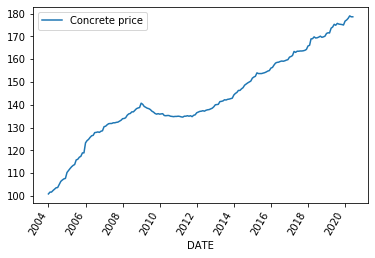

,Concrete price
DATE,
2020-02-01,177.2
2020-03-01,177.9
2020-04-01,179.0
2020-05-01,178.6
2020-06-01,178.6


In [3]:
df_const = load_construction_industry()
df_concrete = df_const['concrete_price']
df_concrete.index = pd.to_datetime(df_concrete['DATE'])
df_concrete = df_concrete.loc['2004':,:]
df_concrete = df_concrete.drop(['DATE'], axis=1)
df_concrete.columns = ['Concrete price']
ax = df_concrete.plot(x_compat=True)
plt.xticks(rotation=60)
plt.show()
df_concrete.iloc[-5:]

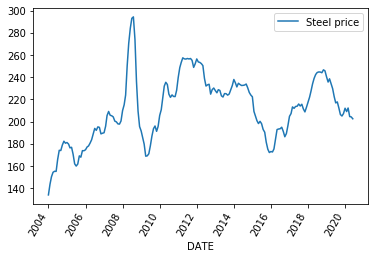

,Steel price
DATE,
2020-02-01,209.1
2020-03-01,212.3
2020-04-01,204.6
2020-05-01,204.3
2020-06-01,202.6


In [4]:
df_const = load_construction_industry()
df_steel = df_const['steel_iron_price']
df_steel.index = pd.to_datetime(df_steel['DATE'])
df_steel = df_steel.loc['2004':,:]
df_steel = df_steel.drop(['DATE'], axis=1)
df_steel.columns = ['Steel price']
ax = df_steel.plot(x_compat=True)
plt.xticks(rotation=60)
plt.show()
df_steel.iloc[-5:]

               Value
TIME                
2003-Q3  31941.08537
2003-Q4  31500.67606
2004-Q1  34074.97289
2004-Q2  33761.60324
2004-Q3  34558.31307


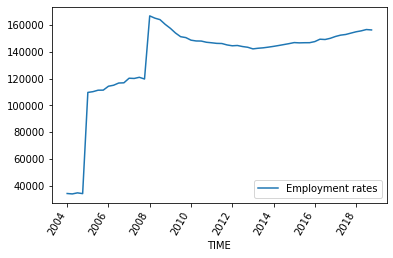

,Employment rates
TIME,
2004-01-01,34074.97289
2004-04-01,33761.60324
2004-07-01,34558.31307
2004-10-01,33992.65850
2005-01-01,109701.30160


In [5]:
import numpy as np
df_const = load_construction_industry()
df_employ = df_const['employment_rates']

df_employ = df_employ.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)
df_employ = pd.pivot_table(df_employ, values='Value', index='TIME', aggfunc = np.sum)
print(df_employ.head())


df_employ.index = pd.to_datetime(df_employ.index)
df_employ = df_employ.loc['2004':,:]
#df_employ = df_employ.drop(['DATE'], axis=1)
df_employ.columns = ['Employment rates']
ax = df_employ.plot(x_compat=True)
plt.xticks(rotation=60)
plt.show()
df_employ.iloc[:5]

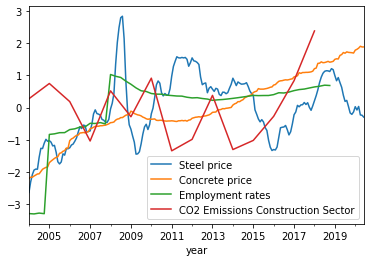

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def scale(df):
    df_scaled = pd.DataFrame(scaler.fit_transform(df))
    df_scaled.index = df.index
    df_scaled.columns = df.columns
    return df_scaled

plt.figure()
ax = plt.gca()
steel_norm = scale(df_steel)
concrete_norm = scale(df_concrete)
employ_norm = scale(df_employ)
co2_norm = scale(pd.DataFrame(co2_sum))
co2_norm.columns = ['CO2 Emissions Construction Sector']
steel_norm.plot(ax=ax)
concrete_norm.plot(ax=ax)
employ_norm.plot(ax=ax)
co2_norm.plot(ax=ax)
#co2_sum.plot(ax=ax)

In [7]:
steel_data = df_steel['Steel price']
concrete_data = df_concrete['Concrete price']
co2_data = co2_sum
employment_data = df_employ['Employment rates']
print("Corr coeff: steel price \t <-> co2 emissions in construction sector:", steel_data.corr(co2_data))
print("Corr coeff: concrete price \t <-> co2 emissions in construction sector: ", concrete_data.corr(co2_data))
print("Corr coeff: employment rates \t <-> co2 emissions in construction sector: ", employment_data.corr(co2_data))


Corr coeff: steel price 	 <-> co2 emissions in construction sector: -0.28764379162515696
Corr coeff: concrete price 	 <-> co2 emissions in construction sector:  0.13321494690308722
Corr coeff: employment rates 	 <-> co2 emissions in construction sector:  -0.0023537968787291827


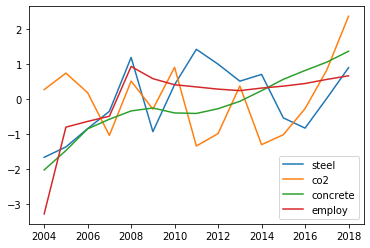

In [8]:
steel = steel_norm.groupby(steel_norm.index.year).mean()
steel = steel.loc['2004':'2018',:]
co2 = co2_norm.groupby(co2_norm.index.year).mean()
co2 = co2.loc['2004':'2018',:]
concrete = concrete_norm.groupby(concrete_norm.index.year).mean()
concrete = concrete.loc['2004':'2018',:]
employ = employ_norm.groupby(employ_norm.index.year).mean()
employ = employ.loc['2004':'2018',:]
plt.plot(steel, label='steel')
plt.plot(co2, label='co2')
plt.plot(concrete, label='concrete')
plt.plot(employ, label='employ')
plt.legend()

In [9]:
def get_emissions_per_country(country):
    gg_data = load_co2_data()
    co2_df = gg_data['co2_country_sector']['Buildings']
    co2_df.index = pd.to_datetime(co2_df.index)
    co2_df = co2_df.loc['2004':, :]
    co2_df = co2_df[country]
    #co2_sum = co2_sum.drop(['year'])
    co2_df.columns = ['CO2 Construction Sector']
    #co2_df.plot()
    co2_df.values.ravel()
    #plt.show()
    co2_df.iloc[-5:]
    return co2_df
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def scale_and_split(df, is_co2=False):
    df_scaled = pd.DataFrame(scaler.fit_transform(df))
    df_scaled.index = df.index
    df_scaled.columns = df.columns
    df_yearly_train = df_scaled.groupby(df_scaled.index.year).mean()
    df_yearly_train = df_yearly_train.loc['2004':'2018',:]
    yearly_train = df_yearly_train.values.reshape(-1, 1)
    
    if not is_co2: 
        df_monthly_pred = df_scaled.loc['2004':'2020',:]
        monthly_pred = df_monthly_pred.values.reshape(-1, 1)
        return [yearly_train, monthly_pred, df_scaled]
    else:
        return [yearly_train.ravel(), scaler]

     Month  3 month moving average
0  2010-01                    88.1
1  2010-02                    87.9
2  2010-03                    89.7
3  2010-04                    88.8
4  2010-05                    87.5


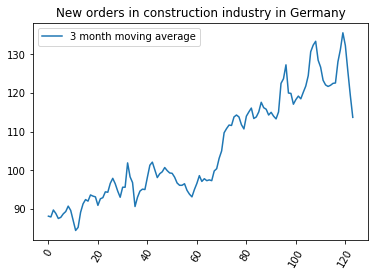

In [10]:
df_const = load_construction_industry()
df_de_orders = df_const['de-new-orders-main-construction-industry']
df_de_orders = df_de_orders.drop(['Calendar and seasonally adjusted (X13 JDemetra+)', 'Trend cycle component (Berlin method)'], axis=1)
print(df_de_orders.head())
#df_de_const.index = pd.to_datetime(df_de_const.index, format="%d/%m/%Y %s")
#df_de_const = df_de_const.loc['2004':,:]
#df_de_const = df_de_const.drop([1], axis=1)
#df_de_const.columns = ['Concrete price']
ax = df_de_orders.plot(x_compat=True)
plt.xticks(rotation=60)
plt.title("New orders in construction industry in Germany")
plt.show()

            Production concrete cement
DATE                                  
1972-01-01                    110.3053
1972-02-01                    107.5955
1972-03-01                    106.7628
1972-04-01                    106.4700
1972-05-01                    104.9969


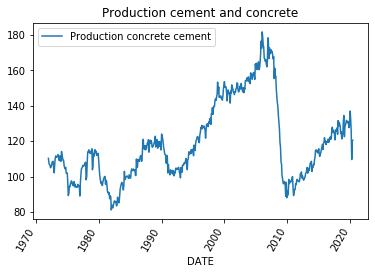

In [11]:
df_const = load_construction_industry()
df_prod_c = df_const['production_cement_concrete']
#df_de_orders = df_de_orders.drop(['Calendar and seasonally adjusted (X13 JDemetra+)', 'Trend cycle component (Berlin method)'], axis=1)

df_prod_c.index = pd.to_datetime(df_prod_c['DATE'])
df_prod_c = df_prod_c.drop(['DATE'], axis=1)
df_prod_c.columns = ['Production concrete cement']
ax = df_prod_c.plot(x_compat=True)
print(df_prod_c.head())
plt.xticks(rotation=60)
plt.title("Production cement and concrete")
plt.show()

            Total construction spending
DATE                                   
1993-01-01                       458080
1993-02-01                       462967
1993-03-01                       458399
1993-04-01                       469425
1993-05-01                       468998


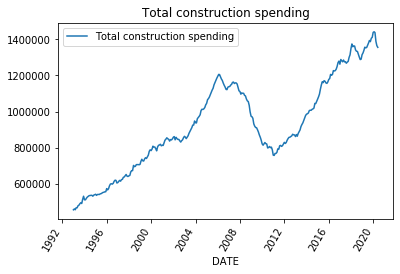

In [12]:
df_const = load_construction_industry()
df_spend = df_const['total_construction_spending']
#df_de_orders = df_de_orders.drop(['Calendar and seasonally adjusted (X13 JDemetra+)', 'Trend cycle component (Berlin method)'], axis=1)

df_spend.index = pd.to_datetime(df_spend['DATE'])
df_spend = df_spend.drop(['DATE'], axis=1)
df_spend.columns = ['Total construction spending']
print(df_spend.head())
ax = df_spend.plot(x_compat=True)
plt.xticks(rotation=60)
plt.title("Total construction spending")
plt.show()

Fitting 15 folds for each of 8 candidates, totalling 120 fits
EU
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
-0.6764641810619236


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


Fitting 15 folds for each of 8 candidates, totalling 120 fits
United States
{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
-0.7362204134613684


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


Fitting 15 folds for each of 8 candidates, totalling 120 fits
India
{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
-0.23260336521788993


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


Fitting 15 folds for each of 8 candidates, totalling 120 fits
China
{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
-0.3677797236787454


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


Fitting 15 folds for each of 8 candidates, totalling 120 fits
Japan
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
-0.3294297487624552


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


Fitting 15 folds for each of 8 candidates, totalling 120 fits
Russia
{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
-0.6787211149858899


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


Fitting 15 folds for each of 8 candidates, totalling 120 fits
Canada
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
-1.202439319102889


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


Fitting 15 folds for each of 8 candidates, totalling 120 fits
Brazil
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
-0.3803864146964717


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


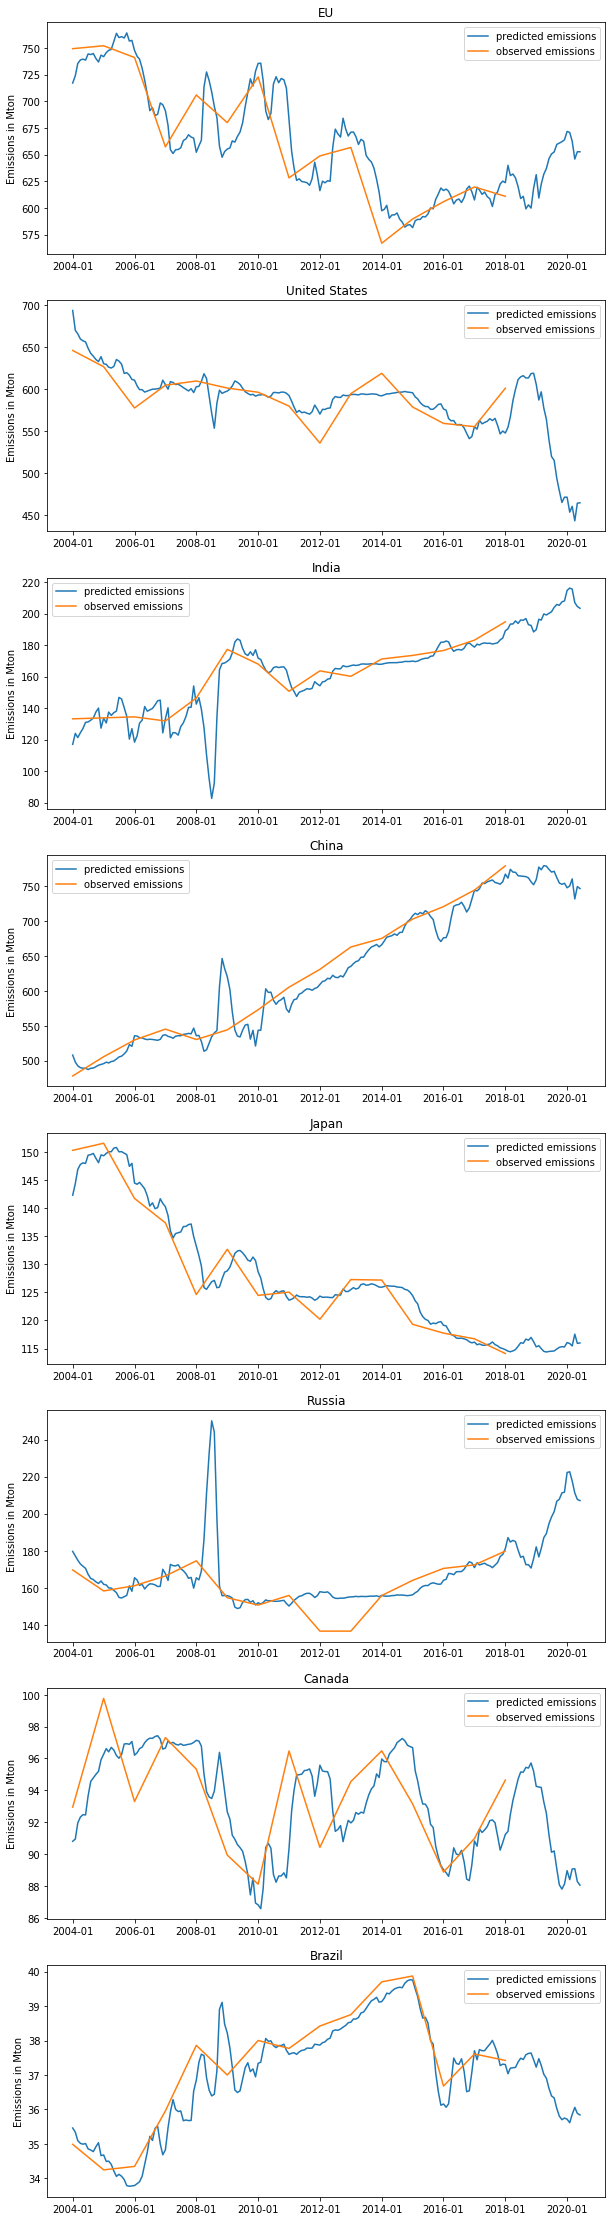

<Figure size 720x2880 with 0 Axes>

In [13]:
from sklearn import svm
from sklearn import model_selection
from matplotlib.dates import DateFormatter
#X_train, X_test, y_train, y_test = model_selection.train_test_split(features, co2_, test_size=0.33, random_state=42, shuffle=True)
# , 'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],'gamma': [0.001, 0.005, 0.1, 1]
indicators = dict()
steel_train, steel_pred, steel_df = scale_and_split(df_steel)
concrete_train, concrete_pred, concrete_df = scale_and_split(df_concrete)
employ_train, employ_pred, employ_df = scale_and_split(df_employ)
prod_train, prod_pred, prod_df = scale_and_split(df_prod_c)
spend_train, spend_pred, spend_df = scale_and_split(df_spend)

indicators["generic"] = dict()
indicators["generic"]["train"] = np.hstack((steel_train, concrete_train, prod_train, spend_train))
indicators["generic"]["pred"] = np.hstack((steel_pred, concrete_pred, prod_pred, spend_pred))
indicators["Germany"] = None
indicators["United States"] = None
indicators["India"] = None
indicators["China"] = None
indicators["EU"] = None
indicators["Brazil"] = None
indicators["Russia"] = None
indicators["Japan"] = None
indicators["Canada"] = None

estimators = dict()
scalers = dict()

results = pd.DataFrame(np.zeros((8, 6)))
results.columns = steel_df.index[-6:]

regr = svm.SVR()
parameters = {'kernel':['rbf', 'poly'], 'C':[10, 100, 1000, 10000], 'gamma':['auto']}#, 'epsilon':[1e-7, 1e-6, 1e-5]}#, 'gamma':[0.001, 0.1, 1, 10], 'epsilon':[0.1, 1]}
grid_search = model_selection.GridSearchCV(regr, parameters, verbose=1, scoring='neg_root_mean_squared_error', cv=15)


countries = ["EU", "United States", "India", "China", "Japan", "Russia", "Canada", "Brazil"]
#countries = ["Canada", "EU"]
fig, axs = plt.subplots(len(countries), figsize=(10, 5*len(countries)))
for idx, country in enumerate (countries):
    if indicators[country]:
        features_train = np.hstack((indicators["generic"]["train"], indicators[country]))
        features_pred = np.hstack((indicators["generic"]["pred"], indicators[country]))
    else:
        features_train = indicators["generic"]["train"]
        features_pred = indicators["generic"]["pred"]
    df_co2 = get_emissions_per_country(country)
    co2_train, scaler = scale_and_split(pd.DataFrame(df_co2), is_co2=True)
    grid_search.fit(features_train, co2_train)
    best_est = grid_search.best_estimator_
    estimators[country] = best_est
    scalers[country] = scaler
    print(country)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    pred = best_est.predict(features_pred)
    axs[idx].title.set_text(country)
    axs[idx].plot(steel_df.index, scaler.inverse_transform(pred), label='predicted emissions')
    axs[idx].plot(df_co2.index, scaler.inverse_transform(co2_train), label='observed emissions')
    axs[idx].legend()
    date_form = DateFormatter("%Y-%m")
    axs[idx].xaxis.set_major_formatter(date_form)
    axs[idx].set_ylabel("Emissions in Mton")
    extent = axs[idx].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    country_camel_case = country.lower().replace(" ", "_")
    fig.savefig('../../results/buildings/{}.pdf'.format(country_camel_case), bbox_inches=extent.expanded(1.1, 1.2))
    results.loc[idx] = scaler.inverse_transform(pred)[-6:]
    results.rename(index={idx: country_camel_case}, inplace=True)
plt.figure(figsize=(10, 5*len(countries)))
plt.tight_layout()
plt.show()
results.to_csv('../../results/buildings/emission_predictions.csv')

In [22]:
import pickle

f = open("../../results/buildings/estimators.pkl", "wb")
pickle.dump(estimators, f)
f.close()

f = open("../../results/buildings/scalers.pkl", "wb")
pickle.dump(scalers, f)
f.close()



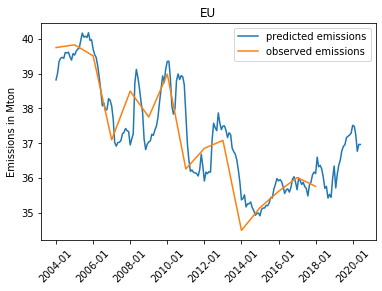

In [1]:
from sklearn.preprocessing import StandardScaler
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# add path
if '../..' in sys.path:
    pass
else:
    sys.path.insert(0, '../..')
from loader.greenhouse_loader import GreenhouseLoader
from loader.construction_industry import ConstructionLoader

scaler = StandardScaler()

def scale_and_split(df, is_co2=False):
    df_scaled = pd.DataFrame(scaler.fit_transform(df))
    df_scaled.index = df.index
    df_scaled.columns = df.columns
    df_yearly_train = df_scaled.groupby(df_scaled.index.year).mean()
    df_yearly_train = df_yearly_train.loc['2004':'2018',:]
    yearly_train = df_yearly_train.values.reshape(-1, 1)
    
    if not is_co2: 
        df_monthly_pred = df_scaled.loc['2004':'2020',:]
        monthly_pred = df_monthly_pred.values.reshape(-1, 1)
        return [yearly_train, monthly_pred, df_scaled]
    else:
        return [yearly_train.ravel(), scaler]
    
def load_construction_industry():
    construction_loader = ConstructionLoader()
    cur_dir = os.getcwd()
    os.chdir('../../')
    construction_loader.load()
    df_construction = construction_loader.get_data()
    os.chdir(cur_dir)
    return df_construction

def get_emissions_per_country(country):
    gg_data = load_co2_data()
    co2_df = gg_data['co2_country_sector']['Buildings']
    co2_df.index = pd.to_datetime(co2_df.index)
    co2_df = co2_df.loc['2004':, :]
    co2_df = co2_df[country]
    #co2_sum = co2_sum.drop(['year'])
    co2_df.columns = ['CO2 Construction Sector']
    #co2_df.plot()
    co2_df.values.ravel()
    #plt.show()
    co2_df.iloc[-5:]
    return co2_df

def load_co2_data():
    ghg_loader = GreenhouseLoader()
    cur_dir = os.getcwd()
    os.chdir('../../')
    ghg_loader.load()
    df_ghg = ghg_loader.get_data()
    os.chdir(cur_dir)
    return df_ghg


df_const = load_construction_industry()
df_concrete = df_const['concrete_price']
df_concrete.index = pd.to_datetime(df_concrete['DATE'])
df_concrete = df_concrete.loc['2004':,:]
df_concrete = df_concrete.drop(['DATE'], axis=1)
df_concrete.columns = ['Concrete price']

df_steel = df_const['steel_iron_price']
df_steel.index = pd.to_datetime(df_steel['DATE'])
df_steel = df_steel.loc['2004':,:]
df_steel = df_steel.drop(['DATE'], axis=1)
df_steel.columns = ['Steel price']

df_spend = df_const['total_construction_spending']
df_spend.index = pd.to_datetime(df_spend['DATE'])
df_spend = df_spend.drop(['DATE'], axis=1)
df_spend.columns = ['Total construction spending']

df_prod_c = df_const['production_cement_concrete']
df_prod_c.index = pd.to_datetime(df_prod_c['DATE'])
df_prod_c = df_prod_c.drop(['DATE'], axis=1)
df_prod_c.columns = ['Production concrete cement']
    
import pickle

f = open("../../results/buildings/estimators.pkl", "rb")
estimates = pickle.load(f)
f.close()

f = open("../../results/buildings/scalers.pkl", "rb")
scalers = pickle.load(f)
f.close()

from sklearn import svm
from sklearn import model_selection
from matplotlib.dates import DateFormatter
indicators = dict()
steel_train, steel_pred, steel_df = scale_and_split(df_steel)
concrete_train, concrete_pred, concrete_df = scale_and_split(df_concrete)
prod_train, prod_pred, prod_df = scale_and_split(df_prod_c)
spend_train, spend_pred, spend_df = scale_and_split(df_spend)

indicators["generic"] = dict()
indicators["generic"]["pred"] = np.hstack((steel_pred, concrete_pred, prod_pred, spend_pred))


results = pd.DataFrame(np.zeros((8, 6)))
results.columns = steel_df.index[-6:]

regr = svm.SVR()
parameters = {'kernel':['rbf', 'poly'], 'C':[10, 100, 1000, 10000], 'gamma':['auto']}#, 'epsilon':[1e-7, 1e-6, 1e-5]}#, 'gamma':[0.001, 0.1, 1, 10], 'epsilon':[0.1, 1]}
grid_search = model_selection.GridSearchCV(regr, parameters, verbose=1, scoring='neg_root_mean_squared_error', cv=15)


country = "EU"
plt.figure()
axs = plt.gca()
features_pred = indicators["generic"]["pred"]
df_co2 = get_emissions_per_country(country)
co2_train,scaler = scale_and_split(pd.DataFrame(df_co2), is_co2=True)
best_est = estimates[country]
pred = best_est.predict(features_pred)
axs.title.set_text(country)
axs.plot(steel_df.index, scalers[country].inverse_transform(pred), label='predicted emissions')
axs.plot(df_co2.index, scalers[country].inverse_transform(co2_train), label='observed emissions')
axs.legend()
date_form = DateFormatter("%Y-%m")
axs.xaxis.set_major_formatter(date_form)
axs.set_ylabel("Emissions in Mton")
plt.xticks(rotation=45)
plt.show()

## This was globally, now we do it only for Germany

In [1]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt

# add path
if '../..' in sys.path:
    pass
else:
    sys.path.insert(0, '../..')

from loader.greenhouse_loader import GreenhouseLoader
from loader.construction_industry import ConstructionLoader

def load_co2_data():
    ghg_loader = GreenhouseLoader()
    cur_dir = os.getcwd()
    os.chdir('../../')
    ghg_loader.load()
    df_ghg = ghg_loader.get_data()
    os.chdir(cur_dir)
    return df_ghg

def load_construction_industry():
    construction_loader = ConstructionLoader()
    cur_dir = os.getcwd()
    os.chdir('../../')
    construction_loader.load()
    df_construction = construction_loader.get_data()
    os.chdir(cur_dir)
    return df_construction

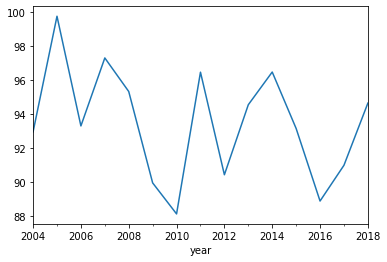

year
2014-01-01      96.48
2015-01-01      93.15
2016-01-01      88.87
2017-01-01      90.98
2018-01-01    94.6452
Name: Canada, dtype: object

In [41]:
gg_data = load_co2_data()
co2_df = gg_data['co2_country_sector']['Buildings']
co2_df.index = pd.to_datetime(co2_df.index)

co2_df = co2_df.loc['2004':, :]
co2_de = co2_df['Canada']
#co2_sum = co2_sum.drop(['year'])
co2_de.columns = ['CO2 Construction Sector']
co2_de.plot()
plt.show()
co2_de.iloc[-5:]

In [3]:
'de-building-permits',
                     'de-construction-industry', 'de-new-orders-main-construction-industry',
                     'de-persons-employed-turnover-main-construction-industry'

IndentationError: unexpected indent (<ipython-input-3-c69866544907>, line 2)

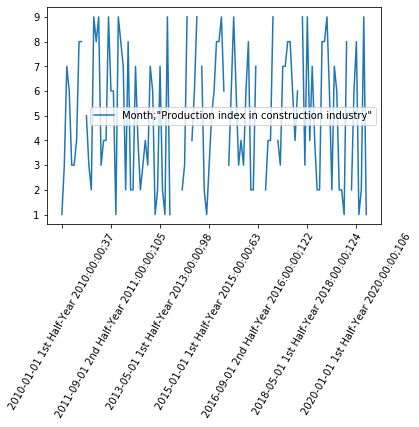

,"Month;""Production index in construction industry"""
2020-01-01 1st Half-Year 2020:00:00;106,8.0
2020-02-01 1st Half-Year 2020:00:00;109,1.0
2020-03-01 1st Half-Year 2020:00:00;132,2.0
2020-04-01 1st Half-Year 2020:00:00;136,9.0
2020-05-01 1st Half-Year 2020:00:00;131,1.0


In [3]:
df_const = load_construction_industry()
df_de_const = df_const['de-construction-industry']
df_de_const.head()
#df_de_const.index = pd.to_datetime(df_de_const.index, format="%d/%m/%Y %s")
df_de_const = df_de_const.loc['2004':,:]
#df_de_const = df_de_const.drop(['DATE'], axis=1)
#df_de_const.columns = ['Concrete price']
ax = df_de_const.plot(x_compat=True)
plt.xticks(rotation=60)
plt.show()
df_de_const.iloc[-5:]

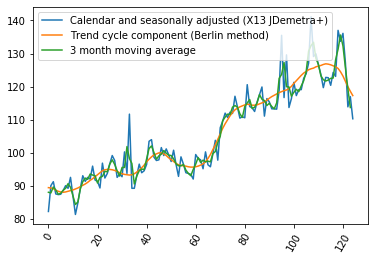

In [4]:
df_const = load_construction_industry()
df_de_const = df_const['de-new-orders-main-construction-industry']
df_de_const.head()
#df_de_const.index = pd.to_datetime(df_de_const.index, format="%d/%m/%Y %s")
#df_de_const = df_de_const.loc['2004':,:]
#df_de_const = df_de_const.drop([1], axis=1)
#df_de_const.columns = ['Concrete price']
ax = df_de_const.plot(x_compat=True)
plt.xticks(rotation=60)
plt.show()
#df_de_const.iloc[-5:]

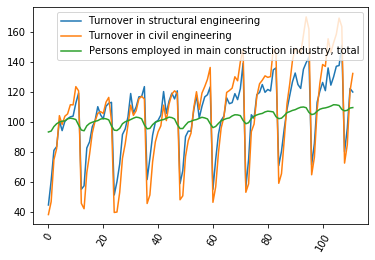

In [5]:
df_const = load_construction_industry()
df_de_const = df_const['de-persons-employed']
df_de_const.head()
#df_de_const.index = pd.to_datetime(df_de_const.index, format="%d/%m/%Y %s")
#df_de_const = df_de_const.loc['2004':,:]
#df_de_const = df_de_const.drop([1], axis=1)
#df_de_const.columns = ['Concrete price']
ax = df_de_const.plot(x_compat=True)
plt.xticks(rotation=60)
plt.show()
#df_de_const.iloc[-5:]

            Value
TIME             
2005-Q1  2344.554
2005-Q2  2415.814
2005-Q3  2378.816
2005-Q4  2443.815
2006-Q1  2374.848


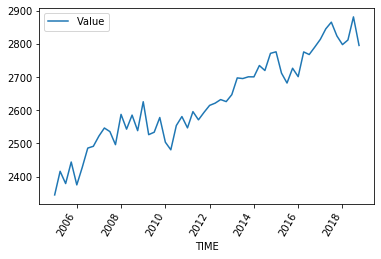

In [42]:
import numpy as np
df_const = load_construction_industry()
df_employ = df_const['employment_rates']

df_employ = df_employ.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)
df_employ = df_employ.loc[df_employ["LOCATION"].isin(["DEU"])]
df_employ = pd.pivot_table(df_employ, values='Value', index='TIME')
print(df_employ.head())

df_employ.index = pd.to_datetime(df_employ.index)
df_employ = df_employ.loc['2004':,:]
#df_employ = df_employ.drop(['DATE'], axis=1)
#df_employ.columns = ['Employment rates']
ax = df_employ.plot(x_compat=True)
plt.xticks(rotation=60)
plt.show()
#df_employ.iloc[:5]